### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code
#%run CGConv.py

#### Train the network

In [2]:
n = 3
popsize = 10
generations = 200
batch_size = 8
wrap_around = True
name = 'centered13'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, batch_size, True, popsize)

2023-03-05 22:18:43,452	INFO worker.py:1528 -- Started a local Ray instance.


[2023-03-05 22:18:45] INFO     <36669> evotorch.core: Instance of `Custom_NEProblem` (id:10906912176) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-05 22:18:45] INFO     <36669> evotorch.core: Instance of `Custom_NEProblem` (id:10906912176) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-05 22:18:45] INFO     <36669> evotorch.core: Instance of `Custom_NEProblem` (id:10906912176) -- The `device` of the problem is set as cpu
[2023-03-05 22:18:45] INFO     <36669> evotorch.core: Instance of `Custom_NEProblem` (id:10906912176) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-05 22:18:45] INFO     <36669> evotorch.core: Instance of `Custom_NEProblem` (id:10906912176) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0394)
    mean_eval : 3.5851237773895264
pop_best_eval : 5.497368812561035
  median_eval : 3.309605598449707

         iter : 2
     stepsize : ReadOnlyTensor(0.0388)
    mean_eval : 4.041208744049072
pop_best_eval : 5.466493129730225
  median_eval : 3.832557201385498

         iter : 3
     stepsize : ReadOnlyTensor(0.0384)
    mean_eval : 3.553414821624756
pop_best_eval : 6.122091293334961
  median_eval : 3.55610990524292

         iter : 4
     stepsize : ReadOnlyTensor(0.0379)
    mean_eval : 4.2604570388793945
pop_best_eval : 7.462922096252441
  median_eval : 4.152295112609863

         iter : 5
     stepsize : ReadOnlyTensor(0.0375)
    mean_eval : 4.129947185516357
pop_best_eval : 5.718006134033203
  median_eval : 4.415006637573242

         iter : 6
     stepsize : ReadOnlyTensor(0.0371)
    mean_eval : 3.8453097343444824
pop_best_eval : 5.950661659240723
  median_eval : 4.0473198890686035

         iter : 7
     stepsize : Rea

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj4_pop_best'])

In [6]:
#trainer.searcher.status

#### Visualize trained network

In [7]:
graphs = [generate_organism(n, device).toGraph() for _ in range(1)]
loader = DataLoader(graphs, batch_size=2)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around)
network.batch_size = 1
network(graph, 0)

DataBatch(x=[53, 5], edge_index=[1, 0], device=[1], subsize=[1], energy=[1], velocity=[1], border_cost=[1], food_reward=[1], dead_cost=[1], visible_food=[1], food_avg_dist=[1], food_avg_degree=[1], food_search_movement=[1], batch=[53], ptr=[2])

In [8]:
anim = visualizer.animate_organism(graph, network, food=30, frames=200)
visualizer.save_animation_to_gif(anim, name, 10)

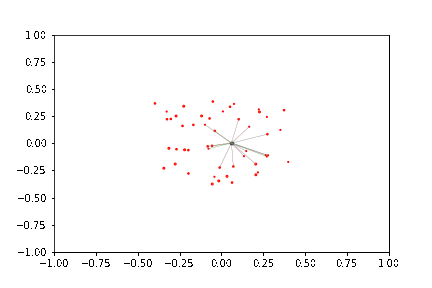

In [9]:
Image('../animation/' + name + '.gif')

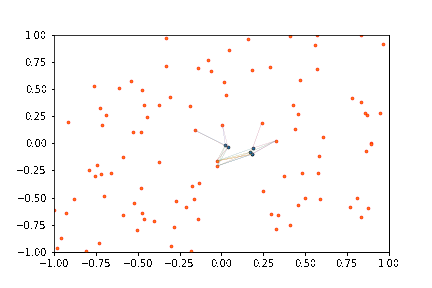

In [10]:
Image('../animation/GATConv1.gif')

In [11]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [12]:
print(network)

CGConv1(
  (conv_layer_food): CustomConvSimple(2, dim=3)
  (conv_layer_cell): CustomConvSimple(2, dim=3)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp_middle): Sequential(
    (0): Linear(in_features=4, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp): Sequential(
    (0): Tanh()
    (1): Linear(in_features=2, out_features=2, bias=True)
    (2): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
  )
  (sigmoid): Sigmoid()
  (tanh): Tanh()
  (mlp_edge): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Tan

In [13]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

AttributeError: 'CGConv1' object has no attribute 'conv_layer_cells'

In [ ]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
)
tensor([-0.4631,  0.2047])
tensor([[-0.3568, -0.2647],
        [ 0.2265,  0.0434]])
tensor([-0.2294,  0.6258])
tensor([[ 0.5711, -0.0884],
        [ 0.0419, -0.6143]])
tensor([ 0.1092, -0.1484])
tensor([[ 0.3713,  0.4383],
        [-0.2452, -0.0072]])
tensor([0.7985, 0.0387])
tensor([[-0.1080, -0.0663],
        [-0.5820,  0.5204]])
tensor([-0.4454,  0.5038])
tensor([[ 0.1847,  0.2597],
        [ 0.3155, -0.0242]])
tensor([ 0.4293, -0.0842])
tensor([[-0.0025, -0.2785],
        [-0.1389,  0.4057]])


In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

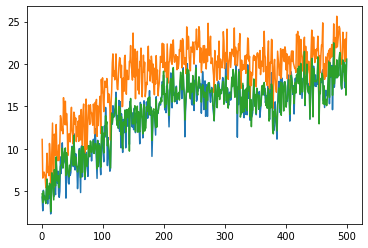

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

In [ ]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()